# ЛР №2. Реалiзацiя базової архiтектури згорткової нейронної мережi для вирiшення задачi класифiкацiї чи регресiї

Імпорт залежностей

In [6]:
import keras

from keras import layers

from src.visualization.plot import plot_loss_and_val_accuracy, plot_loss_and_val_loss
from src.data.mnist import create_mnist_data_generator

## Виконання роботи

1. Обрати фреймворк для виконання роботи: tensorflow чи pytorch.
2. Обрати простий датасет зображень для вирiшення задачi класифiкацiї чи регресiї. Наприклад, MNIST, Fashion MNIST, Pistachio ImageDataset, Date Fruit Datasets чи iншi.
3. Завантажити, предобробити та роздiлити датасет на тренувальну, валiдацiйну та тестову вибiрки.

In [2]:
train_gen, valid_gen, test_gen, num_classes, input_shape = create_mnist_data_generator(
    batch_size=256, validation_split=0.1
)

2024-10-03 23:23:02.338663: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-10-03 23:23:02.338697: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-10-03 23:23:02.338706: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-10-03 23:23:02.338731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-03 23:23:02.338746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


4. Обрати базову просту архiтектуру згорткової мережi: LeNet5, AlexNet, ZFNet чи побудувати власну.
5. Реалiзувати вибрану архiтектуру на вибраному фреймворцi з нуля з використанням вбудованих класiв шарiв, оптимiзаторiв та iнше.

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.ZeroPadding2D(padding=2),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(120, activation="relu"),
        layers.Dense(84, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 32, 32, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                        

6. Навчити мережу на завантаженому датасетi, використовуючи рiзнi гiперпараметри (можливо, але не обов’язково, використати grid search та cross validation).

In [4]:
train_feedback = model.fit(train_gen, epochs=100, validation_data=valid_gen)

score = model.evaluate(test_gen, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100


2024-10-03 23:23:02.852031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-10-03 23:23:02.884483: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


211/211 [==============================] - 4s 15ms/step - loss: 1.8056 - accuracy: 0.5272 - val_loss: 1.2707 - val_accuracy: 0.7512
Epoch 2/100
211/211 [==============================] - 3s 15ms/step - loss: 0.9479 - accuracy: 0.8089 - val_loss: 0.7327 - val_accuracy: 0.8435
Epoch 3/100
211/211 [==============================] - 3s 14ms/step - loss: 0.7182 - accuracy: 0.8499 - val_loss: 0.7662 - val_accuracy: 0.8473
Epoch 4/100
211/211 [==============================] - 3s 14ms/step - loss: 0.7384 - accuracy: 0.8581 - val_loss: 0.7135 - val_accuracy: 0.8588
Epoch 5/100
211/211 [==============================] - 3s 14ms/step - loss: 0.6911 - accuracy: 0.8621 - val_loss: 0.6675 - val_accuracy: 0.8605
Epoch 6/100
211/211 [==============================] - 3s 14ms/step - loss: 0.6454 - accuracy: 0.8641 - val_loss: 0.6255 - val_accuracy: 0.8628
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 0.6070 - accuracy: 0.8664 - val_loss: 0.5898 - val_accuracy: 0.8648
Epoc

7. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати, зробити висновки.

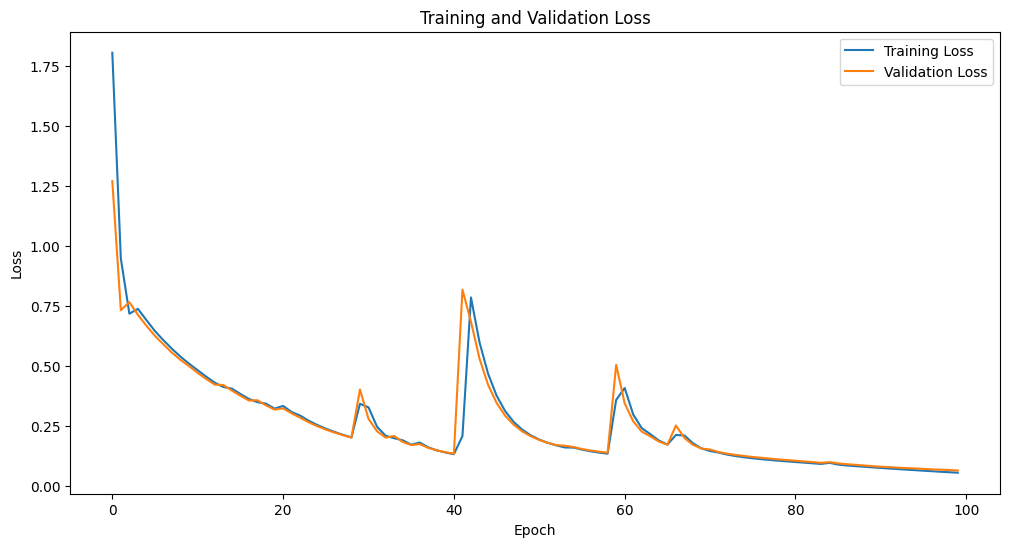

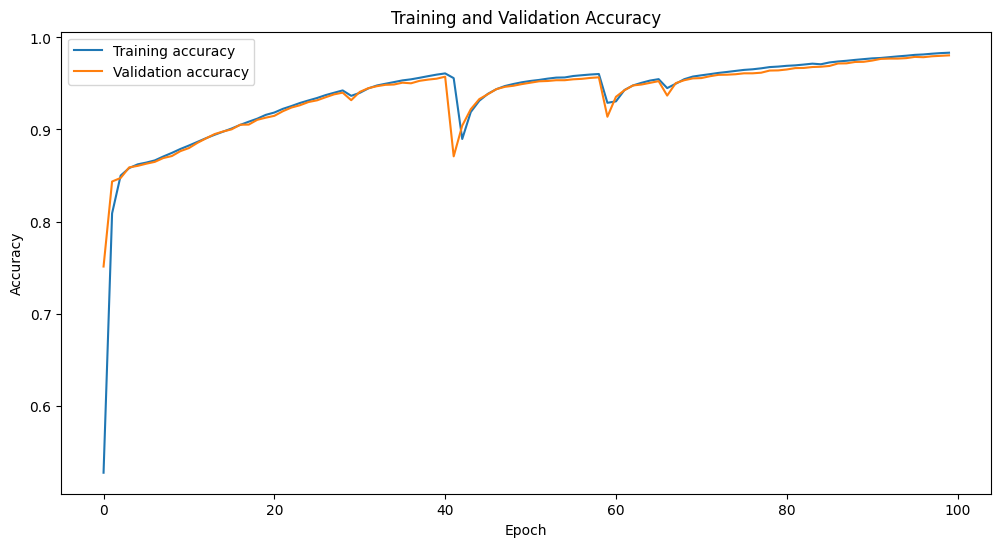

In [5]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)